# Set Up

In [1]:
#import packages

import pandas as pd
from nilearn import surface
import numpy as np
import os
import glob
import usefulFunctions as uf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


In [2]:
# flag to save figures
save_fig = False

# set directories
base_dir = f'{os.path.dirname(os.getcwd())}/'
csv_dir = f'{base_dir}analysis/CSVs/'
fig_dir = f'{base_dir}figures/'

In [3]:
# function to aid with visualization aesthetics 
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new


# Plot sepTask ROI mean PSCs

In [4]:
# load data
df = pd.read_csv(f'{csv_dir}sepTaskROIs_sepTaskMaps_meanPSC.csv')

# filter df
df = df[~df['category'].str.contains('text', na=False)]
# df=df.query('roi=="VWFA1" or roi=="VWFA2"')
df['task_combo'] = df['map_task'] + '-' + df['roi_task']

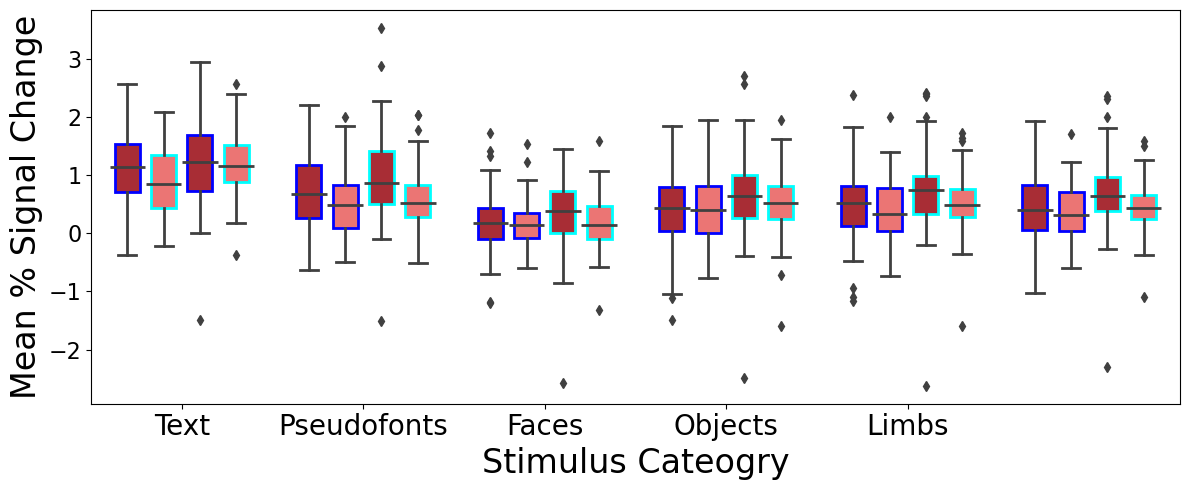

In [5]:
# Set the order for the combined categories
combined_category_order = ['oneback-oneback', 'oneback-fixation', 'fixation-oneback', 'fixation-fixation']

# Set colors for fill based on task
fill_palette = {'oneback-oneback': '#bc1823', 'oneback-fixation': '#bc1823',
                'fixation-oneback': '#ff6260', 'fixation-fixation': '#ff6260'}
custom_edge_colors = ['blue','blue','cyan','cyan']

# Create the boxplot with the new combined column
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=df, 
                      x='category', 
                      y='mean_psc', 
                      hue = 'task_combo', #gap=.2,
                      palette=fill_palette,
                      linewidth=2)

# Set custom edge colors 
for i, box in enumerate(boxplot.patches):
    box.set_edgecolor(custom_edge_colors[i % len(custom_edge_colors)])
    

# Set labels
plt.xlabel('Stimulus Cateogry',size=24)
plt.ylabel('Mean % Signal Change',size=24)
plt.xticks(ticks = [0,1,2,3,4],
           labels=['Text','Pseudofonts','Faces','Objects','Limbs'],
          size=20)
plt.yticks(size=16)

#remove the legend
plt.legend().remove()

# adjust figure layout
adjust_box_widths(fig, 0.7)
plt.tight_layout()

#save the figure
if save_fig:
    plt.savefig(f'{fig_dir}sepTask_PSC.png',dpi=400)

# Plot sepTask ROI SI

In [8]:
# read in data
df = pd.read_csv(f'{csv_dir}VWFA_SI.csv')

# create task combo column
df['task_combo'] = df['map_task'] + '-' + df['roi_task']

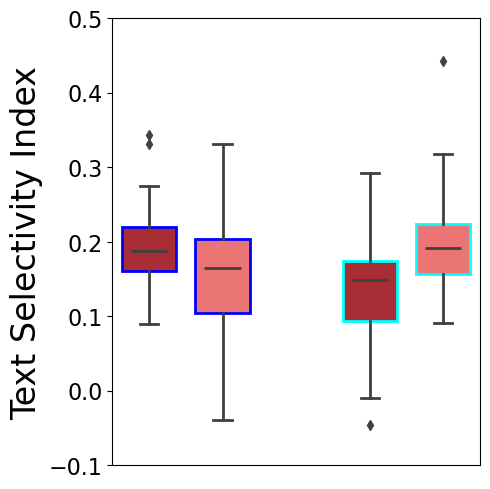

In [9]:
# Set the order for the combined categories
combined_category_order = ['oneback-oneback', 'oneback-fixation', 'fixation-oneback', 'fixation-fixation']

# Set colors for fill based on task
fill_palette = {'oneback-oneback': '#bc1823', 'oneback-fixation': '#bc1823',
                'fixation-oneback': '#ff6260', 'fixation-fixation': '#ff6260'}
custom_edge_colors = ['blue','blue','cyan','cyan']

# Create the boxplot with the new combined column
fig = plt.figure(figsize=(5, 5))
boxplot = sns.boxplot(data=df, 
                      x='roi_task', 
                      order = ['oneback','fixation'],
                      y='SI', 
                      hue = 'task_combo', #gap=.2,
                      hue_order=combined_category_order,
                      palette=fill_palette,
                      linewidth=2)

# Set custom edge colors 
for i, box in enumerate(boxplot.patches):
    box.set_edgecolor(custom_edge_colors[i % len(custom_edge_colors)])
    

# Set labels
plt.xlabel('',size=0)
plt.ylabel('Text Selectivity Index',size=24)
plt.xticks(ticks = [])
plt.yticks(size=16)

# set y axis limits for better vizualizations
plt.ylim(-0.1,0.5)

#remove the legend
plt.legend().remove()

# adjust figure layout
adjust_box_widths(fig, 1.5)
plt.tight_layout()

#save the figure
if save_fig:
    plt.savefig(f'{fig_dir}sepTask_SI.png',dpi=400)

# Plot group labels

In [10]:
# load data
df = pd.read_csv(f'{csv_dir}groupROIs_allDataMaps_meanPSC.csv')
df_psc = df.query('category!="noText"')

In [11]:
#set ROI palette
group_roi_palette = {'VWFA': '#00f48e',
                    'cVWFA': '#c1ff71',
                    'aVWFA': '#7ed957',
                    'rVWFA': '#00bf63',
                    'kVWFA': '#009456',
                     'FFA': '#ff26b9',
                    'cFFA': '#ffb2e6',
                    'aFFA': '#fe69ce',
                    'rFFA': '#e4009a',
                    'kFFA': '#a80072'}

In [12]:
# load native roi PSC
df_native = pd.read_csv(f'{csv_dir}allDataROIs_allDataMaps_meanPSC.csv')

# filter data 
df_native = df_native.query('space=="native"')
df_native=df_native.drop(labels='space',axis=1)

# combine group and native ROI PSC
plot_df = pd.concat([df_native, df], ignore_index=True)


## Plot PSC

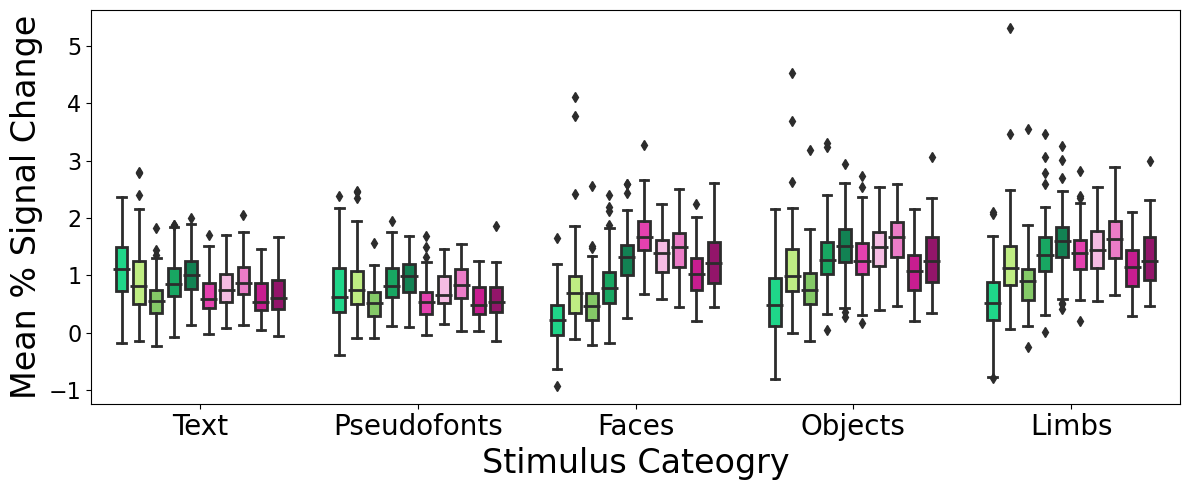

In [13]:
# filter desired categories
psc_plot_df = plot_df.query('category=="T" or category=="FF" or category=="F" or category=="O" or category=="L"')

# Create the boxplot
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=psc_plot_df, 
                      x='category', 
                      y='mean_psc', 
                      hue = 'roi', #gap=.2,
                      hue_order=['VWFA','cVWFA','aVWFA','rVWFA','kVWFA','FFA','cFFA','aFFA','rFFA','kFFA'],
                      palette=group_roi_palette,
                      linewidth=2)

# Set labels
plt.xlabel('Stimulus Cateogry',size=24)
plt.ylabel('Mean % Signal Change',size=24)
plt.xticks(ticks = [0,1,2,3,4],
           labels=['Text','Pseudofonts','Faces','Objects','Limbs'],
          size=20)
plt.yticks(size=16)

#remove the legend
plt.legend().remove()

# adjust figure layout
adjust_box_widths(fig, 0.7)
plt.tight_layout()

#save the figure
if save_fig:
    plt.savefig(f'{fig_dir}groupROIs_PSC.png',dpi=400)

## plot SI

In [14]:
# pivot wide for ease
df_wide = plot_df.query('category == "T" or category == "noText"').pivot(columns = 'category',index=['sub','roi'],values='mean_psc')
df_wide = df_wide.reset_index()
df_wide = df_wide.query('roi=="VWFA" or roi=="cVWFA" or roi=="aVWFA" or roi=="rVWFA" or roi=="kVWFA"')

# calculate text selectivity index
df_wide['SI'] = ((1+df_wide['T'])-(1+df_wide['noText']))/((1+df_wide['T'])+(1+df_wide['noText']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


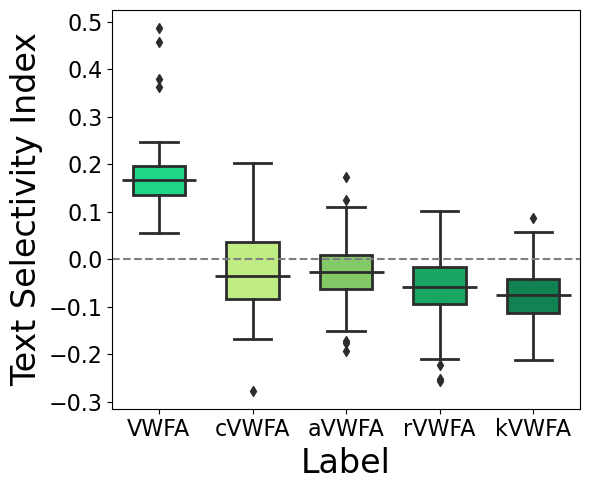

In [15]:
# Create the boxplot
fig = plt.figure(figsize=(6, 5))
boxplot = sns.boxplot(data=df_wide, 
                      x='roi', 
                      y='SI',
                      order=['VWFA','cVWFA','aVWFA','rVWFA','kVWFA'],
                      # hue = 'roi', #gap=.2,
                      palette=group_roi_palette,
                      linewidth=2)

# Set labels
plt.xlabel('Label',size=24)
plt.ylabel('Text Selectivity Index',size=24)
plt.xticks(size=16)
plt.yticks(size=16)

#remove the legend
plt.legend().remove()

# adjust figure layout
adjust_box_widths(fig, 0.7)
plt.tight_layout()

# Add a horizontal line at y = 0
plt.axhline(y=0, color='gray', linestyle='--')

#save the figure
if save_fig:
    plt.savefig(f'{fig_dir}groupROIs_SI.png',dpi=400)